**EXPERIMENT 4**
Amishi Gupta
23/CS/048

In [1]:
!pip install emoji wordcloud textblob beautifulsoup4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 6.1 MB/s eta 0:00:00


In [2]:
#importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import seaborn as sns
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
RANDOM_STATE = 42


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:


df = pd.read_csv('/content/drive/MyDrive/spam.csv')
df.head()



,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#finding shape
print(df.shape)


(5572, 2)


In [6]:
#check null values
print(df.isnull().sum())

Category    0
Message     0
dtype: int64


In [7]:
#find duplicates and drop (inplace=True)
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

415


In [8]:
#now it should be false
df.duplicated().any()


np.False_

In [9]:
#column name check
print(df.columns)


Index(['Category', 'Message'], dtype='object')


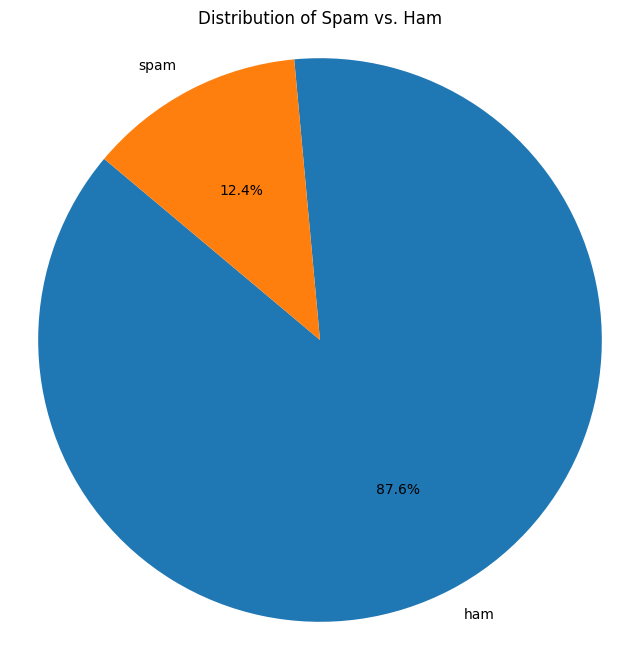

In [10]:
# Calculate the count of each label
category_counts = df['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#TEXT VISUALIZATION

- Iterate through unique categories: This loop iterates through each unique category in the 'Category' column of the DataFrame df.¶
- Filter the DataFrame for the current category: Inside the loop, the code filters the DataFrame df to create a new DataFrame filtered_df containing only the rows where the 'Category' column matches the current category.
- Concatenate all text data for the current category: The code then concatenates all the text data from the 'Message' column of filtered_df into a single string variable named text.
- Generate word cloud: Using the concatenated text data (text), the code generates a word cloud using the WordCloud module. The word cloud is configured to have a width of 800 pixels, a height of 400 pixels, and a white background.
- Plot the word cloud: Finally, the code plots the generated word cloud using Matplotlib. Each word's size in the word cloud is proportional to its frequency in the concatenated text data. The title of each word cloud plot includes the current category being processed. The plt.axis('off') command is used to hide the axes of the plot.
This process repeats for each unique category, generating a separate word cloud for each category based on the text data associated with that category.

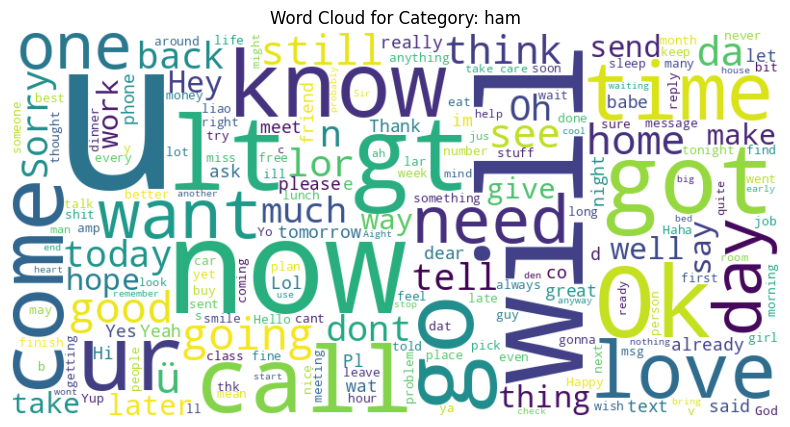

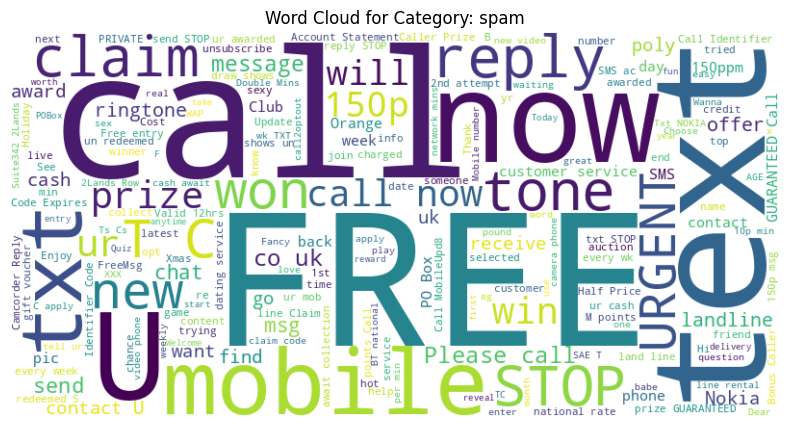

In [11]:
# Iterate through unique categories
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Category'] == category]

    # Concatenate all text data for the current category
    text = ' '.join(filtered_df['Message'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [12]:
#label encoding
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#Text Preprocessing

1. Lower Casing¶
2. Remove Extra White Spaces
3. Remove HTML Tags
4. Remove URLs
5. Remove Punctuations
6. Remove Special Characters
7. Remove Numeric Values
8. Remove Non-alpha Numeric

10. Handling StopWords¶
11. Handling Emojis
12. Stemming



In [13]:
# Convert 'Text' column to lowercase
df['Message']=df['Message'].str.lower()


In [14]:


# Remove extra white spaces from the 'Text' column
df['Message']=df['Message'].apply(lambda x: ' '.join(x.split()))



In [15]:
# Function to remove HTML tags from text
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Remove HTML tags from 'Text' column
df['Message'] = df['Message'].apply(remove_html_tags)

In [16]:


# Define a function to remove URLs using regular expressions
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Apply the function to the 'Text' column
df['Message'] = df['Message'].apply(remove_urls)



In [17]:
# remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '',string.punctuation))
df['Message'] = df['Message'].apply(remove_punctuation)

In [18]:


def remove_special_characters(text):
    # Define the pattern to match special characters
    pattern = r'[^a-zA-Z\s]'
    return re.sub(pattern, '', text)

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_special_characters)



In [19]:
# Function to remove numeric values from text
def remove_numeric(text):
    return re.sub(r'\d+','',text)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_numeric)

In [20]:


# Define a function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    pattern = r'[^a-zA-Z0-9\s]'
    return re.sub(pattern,'', text)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_non_alphanumeric)



In [21]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [22]:


# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    new_words =[]
    for word in words:
        if word.upper() in chat_words:
            new_words.append(chat_words[word.upper()])
        else:
            new_words.append(word)
    return ' '.join(new_words)

# Apply replace_chat_words function to 'Text' column
df['Message'] = df['Message'].apply(replace_chat_words)



In [23]:


# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Message'] = df['Message'].apply(remove_stopwords)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Message'] = df['Message'].apply(remove_emojis)


In [50]:
# Initialize the Porter Stemmer
ps = PorterStemmer()

def stem_text(text):
    words = text.split()
    stemmed_words = [ps.stem(word) for word in words]
    return ' '.join(stemmed_words)

df['Message'] = df['Message'].apply(stem_text)
df.head()


,Category,Message,Message_stemmed
0,0,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif oni,ok lar joke wif oni
2,1,free entri wkli comp win fa cup final tkt st m...,free entri wkli comp win fa cup final tkt st m...
3,0,dun say earli hor c alreadi say,dun say earli hor c alreadi say
4,0,nah dont think goe usf live around though,nah dont think goe usf live around though


#Solve this problem using Logistic Regression(using numpy from scratch)

In [26]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, n_iters=1000, lambda_=0.01):
        self.lr = lr
        self.n_iters = n_iters
        self.lambda_ = lambda_
        self.weights = None
        self.bias = None
        self.costs = []

    def _sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def fit(self, X, y):
        n_samples,n_features =X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.costs = []

        #gradient descent
        for i in range(self.n_iters):
            linear_model = np.dot(X,self.weights)+self.bias
            y_predicted =self._sigmoid(linear_model)

            #cost function
            cost = -(1/n_samples)*np.sum(
                y*np.log(y_predicted) + (1-y)*np.log(1-y_predicted)
            ) + (self.lambda_ / (2 * n_samples)) * np.sum(self.weights**2)
            self.costs.append(cost)

            #derivatives with L2 regularization
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + (self.lambda_ / n_samples) * self.weights # Added L2 regularization term
            db = (1 / n_samples) * np.sum(y_predicted - y)

            #update parameters
            self.weights -= self.lr * dw
            self.bias -=self.lr * db

            if (i+1) % 100 == 0:
                print(f'Epoch {i+1}/{self.n_iters},Cost: {cost:.4f}')

    def predict(self, X):
        linear_model =np.dot(X,self.weights)+self.bias
        y_predicted= self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

In [27]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

In [28]:
#baseline

#convert text to numbers
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Message_stemmed']).toarray()
y = df['Category'].values


In [29]:
#split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
#shapes
print("shape of X_train ",X_train.shape)
print("shape of X_test ",X_test.shape)

shape of X_train  (4125, 7055)
shape of X_test  (1032, 7055)


In [32]:
#train the baseline model
baseline_model = LogisticRegressionScratch(lr=0.01,n_iters=1000)


In [33]:
baseline_model.fit(X_train,y_train)

Epoch 100/1000,Cost: 0.5677
Epoch 200/1000,Cost: 0.4912
Epoch 300/1000,Cost: 0.4425
Epoch 400/1000,Cost: 0.4096
Epoch 500/1000,Cost: 0.3859
Epoch 600/1000,Cost: 0.3680
Epoch 700/1000,Cost: 0.3537
Epoch 800/1000,Cost: 0.3419
Epoch 900/1000,Cost: 0.3318
Epoch 1000/1000,Cost: 0.3230


In [34]:
#make predictions
y_pred_baseline=baseline_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.87      1.00      0.93       896
           1       0.00      0.00      0.00       136

    accuracy                           0.87      1032
   macro avg       0.43      0.50      0.46      1032
weighted avg       0.75      0.87      0.81      1032



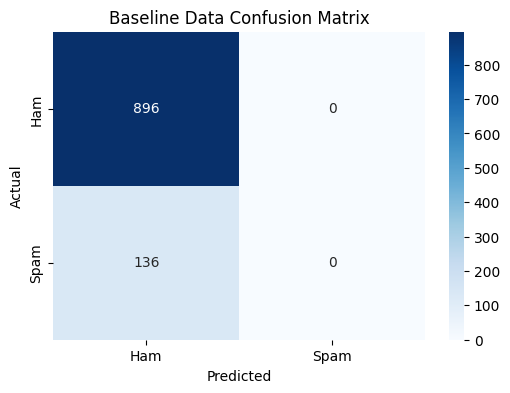

In [35]:
#evaluate the model
print(classification_report(y_test, y_pred_baseline))
plot_confusion_matrix(y_test, y_pred_baseline,"Baseline Data Confusion Matrix")

FEATURE SCALING

In [36]:
#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.transform(X_test.astype(float))

In [37]:
#train the model on scaled data
scaled_model = LogisticRegressionScratch(lr=0.01, n_iters=1000)
scaled_model.fit(X_train_scaled, y_train)

Epoch 100/1000,Cost: 0.3441
Epoch 200/1000,Cost: 0.2320
Epoch 300/1000,Cost: 0.1734
Epoch 400/1000,Cost: 0.1377
Epoch 500/1000,Cost: 0.1140
Epoch 600/1000,Cost: 0.0971
Epoch 700/1000,Cost: 0.0845
Epoch 800/1000,Cost: 0.0748
Epoch 900/1000,Cost: 0.0672
Epoch 1000/1000,Cost: 0.0609


In [40]:
#make predictions
y_pred_scaled = scaled_model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       896
           1       0.91      0.93      0.92       136

    accuracy                           0.98      1032
   macro avg       0.95      0.96      0.95      1032
weighted avg       0.98      0.98      0.98      1032



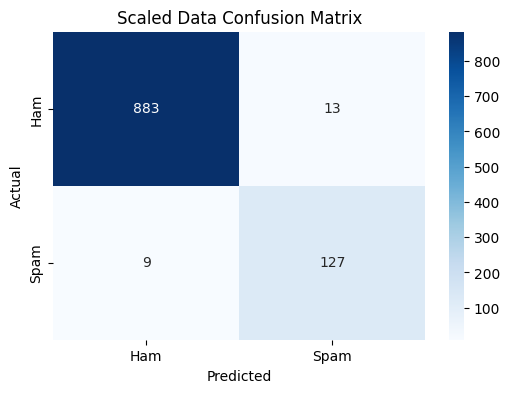

In [41]:
#evaluate the scaled model
print(classification_report(y_test,y_pred_scaled))
plot_confusion_matrix(y_test, y_pred_scaled,"Scaled Data Confusion Matrix")

In [42]:
#create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf_vectorizer.fit_transform(df['Message_stemmed']).toarray()

In [43]:
#split and scale the new feature set
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)
scaler_tfidf= StandardScaler()
X_train_tfidf_scaled = scaler_tfidf.fit_transform(X_train_tfidf)
X_test_tfidf_scaled =scaler_tfidf.transform(X_test_tfidf)

In [44]:
#train model on TF-IDF features
tfidf_model=LogisticRegressionScratch(lr=0.01, n_iters=1000)
tfidf_model.fit(X_train_tfidf_scaled, y_train_tfidf)

Epoch 100/1000,Cost: 0.3731
Epoch 200/1000,Cost: 0.2609
Epoch 300/1000,Cost: 0.2002
Epoch 400/1000,Cost: 0.1623
Epoch 500/1000,Cost: 0.1365
Epoch 600/1000,Cost: 0.1179
Epoch 700/1000,Cost: 0.1038
Epoch 800/1000,Cost: 0.0928
Epoch 900/1000,Cost: 0.0840
Epoch 1000/1000,Cost: 0.0768


In [45]:
#make predictions
y_pred_tfidf = tfidf_model.predict(X_test_tfidf_scaled)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       904
           1       0.77      0.92      0.84       128

    accuracy                           0.96      1032
   macro avg       0.88      0.94      0.91      1032
weighted avg       0.96      0.96      0.96      1032



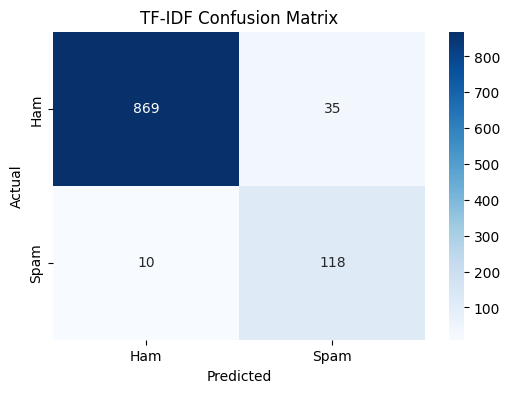

In [46]:
#evaluate the TF-IDF model
print(classification_report(y_test_tfidf,y_pred_tfidf))
plot_confusion_matrix(y_test_tfidf,y_pred_tfidf,"TF-IDF Confusion Matrix")

In [47]:
#TF-DIF performs better



Training Model with L2 Regularization(λ=0.1)
Epoch 100/1000,Cost: 0.3731
Epoch 200/1000,Cost: 0.2609
Epoch 300/1000,Cost: 0.2002
Epoch 400/1000,Cost: 0.1623
Epoch 500/1000,Cost: 0.1365
Epoch 600/1000,Cost: 0.1179
Epoch 700/1000,Cost: 0.1038
Epoch 800/1000,Cost: 0.0928
Epoch 900/1000,Cost: 0.0840
Epoch 1000/1000,Cost: 0.0769

 Evaluation for λ = 0.1
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       904
           1       0.77      0.92      0.84       128

    accuracy                           0.96      1032
   macro avg       0.88      0.94      0.91      1032
weighted avg       0.96      0.96      0.96      1032



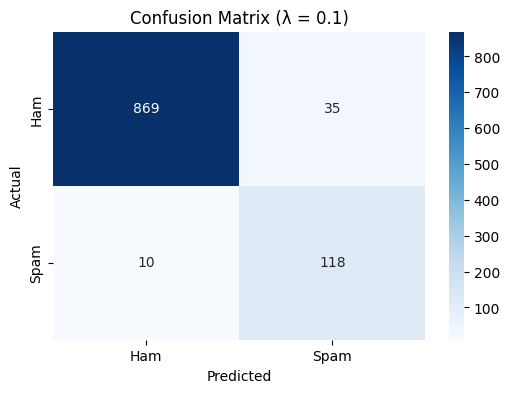


Training Model with L2 Regularization(λ=1)
Epoch 100/1000,Cost: 0.3732
Epoch 200/1000,Cost: 0.2610
Epoch 300/1000,Cost: 0.2003
Epoch 400/1000,Cost: 0.1624
Epoch 500/1000,Cost: 0.1367
Epoch 600/1000,Cost: 0.1181
Epoch 700/1000,Cost: 0.1040
Epoch 800/1000,Cost: 0.0931
Epoch 900/1000,Cost: 0.0843
Epoch 1000/1000,Cost: 0.0771

 Evaluation for λ = 1
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       904
           1       0.77      0.92      0.84       128

    accuracy                           0.96      1032
   macro avg       0.88      0.94      0.91      1032
weighted avg       0.96      0.96      0.96      1032



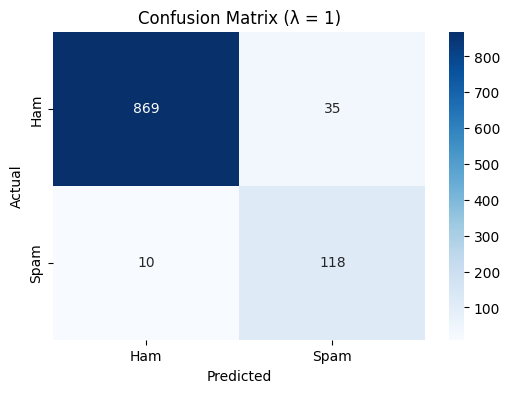


Training Model with L2 Regularization(λ=10)
Epoch 100/1000,Cost: 0.3735
Epoch 200/1000,Cost: 0.2617
Epoch 300/1000,Cost: 0.2014
Epoch 400/1000,Cost: 0.1639
Epoch 500/1000,Cost: 0.1384
Epoch 600/1000,Cost: 0.1200
Epoch 700/1000,Cost: 0.1062
Epoch 800/1000,Cost: 0.0954
Epoch 900/1000,Cost: 0.0869
Epoch 1000/1000,Cost: 0.0799

 Evaluation for λ = 10
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       904
           1       0.77      0.91      0.84       128

    accuracy                           0.96      1032
   macro avg       0.88      0.94      0.91      1032
weighted avg       0.96      0.96      0.96      1032



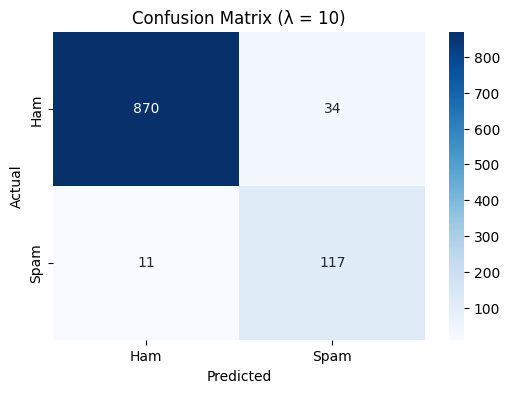


Regularization Results Summary
      accuracy  precision    recall        f1
0.1   0.956395   0.771242  0.921875  0.839858
1.0   0.956395   0.771242  0.921875  0.839858
10.0  0.956395   0.774834  0.914062  0.838710


In [48]:
#regularization
lambda_values =[0.1, 1, 10]
results ={}

for l in lambda_values:
    print(f"\nTraining Model with L2 Regularization(λ={l})")
    reg_model=LogisticRegressionScratch(lr=0.01, n_iters=1000,lambda_=l)
    reg_model.fit(X_train_tfidf_scaled,y_train_tfidf)

    y_pred_reg=reg_model.predict(X_test_tfidf_scaled)

    accuracy=accuracy_score(y_test_tfidf,y_pred_reg)
    precision=precision_score(y_test_tfidf,y_pred_reg)
    recall = recall_score(y_test_tfidf,y_pred_reg)
    f1 = f1_score(y_test_tfidf,y_pred_reg)
    results[l] = {'accuracy': accuracy,'precision': precision,'recall': recall,'f1': f1}

    print(f"\n Evaluation for λ = {l}")
    print(classification_report(y_test_tfidf, y_pred_reg))
    plot_confusion_matrix(y_test_tfidf, y_pred_reg, f"Confusion Matrix (λ = {l})")

print("\nRegularization Results Summary")
results_df=pd.DataFrame.from_dict(results, orient='index')
print(results_df)

In [51]:
X = df['Message']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

**Naive Bayes**

In [52]:
class MultinomialNB:
    def __init__(self,alpha=1.0):
        self.alpha =alpha

    def fit(self, X_train,y_train):
        num_docs,num_features = X_train.shape
        self.classes_ = np.unique(y_train)
        num_classes =len(self.classes_)

        self.class_priors_ = np.zeros(num_classes)
        self.feature_counts_ = np.zeros((num_classes,num_features))
        self.class_counts_ = np.zeros(num_classes)

        for i, c in enumerate(self.classes_):
            X_train_c = X_train[y_train == c]
            self.class_priors_[i] = X_train_c.shape[0]/num_docs
            self.feature_counts_[i, :] = X_train_c.sum(axis=0)
            self.class_counts_[i] = self.feature_counts_[i, :].sum()

    def predict(self,X_test):
        return [self._predict_single(x) for x in X_test]

    def _predict_single(self,x):
        posteriors =[]
        for i, c in enumerate(self.classes_):
            log_prior = np.log(self.class_priors_[i])
            log_likelihood_terms = np.log((self.feature_counts_[i, :]+self.alpha) /
                                          (self.class_counts_[i]+self.alpha*self.feature_counts_.shape[1]))
            log_likelihood = np.sum(log_likelihood_terms * x)
            posterior = log_prior + log_likelihood
            posteriors.append(posterior)
        return self.classes_[np.argmax(posteriors)]

In [53]:
#evaluation with CountVectorizer
cv =CountVectorizer()
X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()

nb_cv =MultinomialNB(alpha=1.0)
nb_cv.fit(X_train_cv, y_train)
y_pred_nb_cv = nb_cv.predict(X_test_cv)


Naive Bayes with CountVectorizer:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       896
           1       0.90      0.93      0.91       136

    accuracy                           0.98      1032
   macro avg       0.94      0.96      0.95      1032
weighted avg       0.98      0.98      0.98      1032



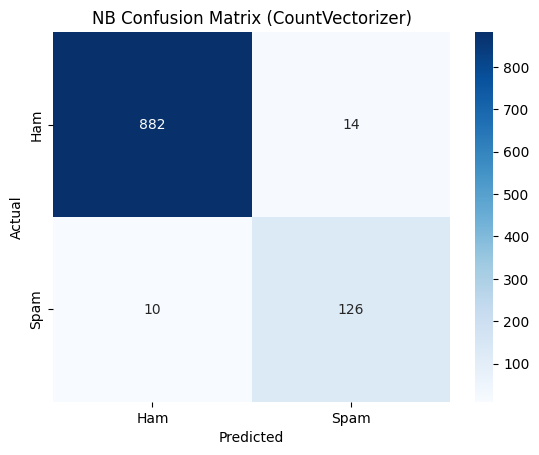

In [54]:
print("Naive Bayes with CountVectorizer:")
accuracy_nb_cv = accuracy_score(y_test,y_pred_nb_cv)
precision_nb_cv =precision_score(y_test,y_pred_nb_cv)
recall_nb_cv = recall_score(y_test,y_pred_nb_cv)
f1_nb_cv = f1_score(y_test,y_pred_nb_cv)

print(classification_report(y_test,y_pred_nb_cv))
cm_nb_cv = confusion_matrix(y_test,y_pred_nb_cv)
sns.heatmap(cm_nb_cv, annot=True,fmt='d',cmap='Blues',xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('NB Confusion Matrix (CountVectorizer)')
plt.show()

In [55]:
#evaluation with TfidfVectorizer
tfidf =TfidfVectorizer()
X_train_tfidf =tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

nb_tfidf = MultinomialNB(alpha=1.0)
nb_tfidf.fit(X_train_tfidf,y_train)
y_pred_nb_tfidf= nb_tfidf.predict(X_test_tfidf)

Naive Bayes with TfidfVectorizer:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       1.00      0.71      0.83       136

    accuracy                           0.96      1032
   macro avg       0.98      0.86      0.91      1032
weighted avg       0.96      0.96      0.96      1032



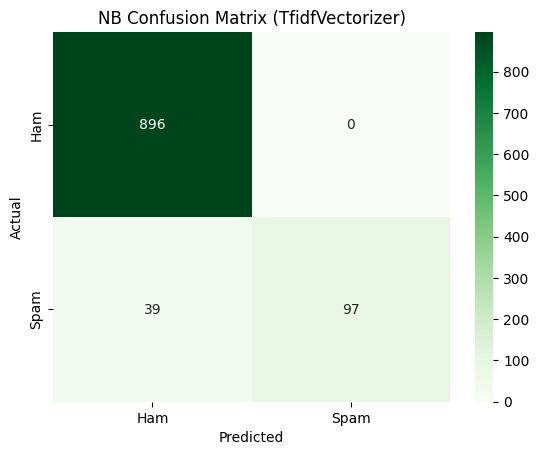

In [56]:
print("Naive Bayes with TfidfVectorizer:")
accuracy_nb_tfidf = accuracy_score(y_test,y_pred_nb_tfidf)
precision_nb_tfidf = precision_score(y_test,y_pred_nb_tfidf)
recall_nb_tfidf = recall_score(y_test, y_pred_nb_tfidf)
f1_nb_tfidf = f1_score(y_test,y_pred_nb_tfidf)

print(classification_report(y_test,y_pred_nb_tfidf))
cm_nb_tfidf = confusion_matrix(y_test,y_pred_nb_tfidf)
sns.heatmap(cm_nb_tfidf, annot=True,fmt='d',cmap='Greens',xticklabels=['Ham', 'Spam'],yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('NB Confusion Matrix (TfidfVectorizer)')
plt.show()

In [57]:
accuracy_lr_cv = accuracy_score(y_test,y_pred_baseline)
precision_lr_cv = precision_score(y_test,y_pred_baseline)
recall_lr_cv = recall_score(y_test,y_pred_baseline)
f1_lr_cv = f1_score(y_test, y_pred_baseline)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#comparative analysis
results_data = {
    'Model': [
        'Logistic Regression (Scratch)',
        'Naive Bayes (Scratch)',
        'Naive Bayes (Scratch)'
    ],
    'Vectorizer': [
        'TF-IDF',
        'Count',
        'TF-IDF'
    ],
    'Reg. λ': [
        0.1,
        '–',
        '–'
    ],
    'Accuracy': [
        f'{accuracy_lr:.2f}',
        f'{accuracy_nb_cv:.2f}',
        f'{accuracy_nb_tfidf:.2f}'
    ],
    'Precision': [
        f'{precision_lr:.2f}',
        f'{precision_nb_cv:.2f}',
        f'{precision_nb_tfidf:.2f}'
    ],
    'Recall': [
        f'{recall_lr:.2f}',
        f'{recall_nb_cv:.2f}',
        f'{recall_nb_tfidf:.2f}'
    ],
    'F1': [
        f'{f1_lr:.2f}',
        f'{f1_nb_cv:.2f}',
        f'{f1_nb_tfidf:.2f}'
    ]
}

results_df = pd.DataFrame(results_data)

print("Final Comparative Analysis of Models")
results_df

In [58]:
summary_data={
    'Model': [
        'Logistic Regression',
        'Logistic Regression',
        'Naive Bayes',
        'Naive Bayes'
    ],
    'Vectorizer': [
        'Count',
        'TF-IDF',
        'Count',
        'TF-IDF'
    ],
    'Reg. λ': [
        0.01,
        0.1,
        '–',
        '–'
    ],
    'Accuracy': [
        accuracy_lr_cv,
        results[0.1]['accuracy'],
        accuracy_nb_cv,
        accuracy_nb_tfidf
    ],
    'Precision': [
        precision_lr_cv,
        results[0.1]['precision'],
        precision_nb_cv,
        precision_nb_tfidf
    ],
    'Recall': [
        recall_lr_cv,
        results[0.1]['recall'],
        recall_nb_cv,
        recall_nb_tfidf
    ],
    'F1': [
        f1_lr_cv,
        results[0.1]['f1'],
        f1_nb_cv,
        f1_nb_tfidf
    ]
}

final_results_df = pd.DataFrame(summary_data)
final_results_df

,Model,Vectorizer,Reg. λ,Accuracy,Precision,Recall,F1
0,Logistic Regression,Count,0.01,0.868217,0.000000,0.000000,0.000000
1,Logistic Regression,TF-IDF,0.1,0.956395,0.771242,0.921875,0.839858
2,Naive Bayes,Count,–,0.976744,0.900000,0.926471,0.913043
3,Naive Bayes,TF-IDF,–,0.962209,1.000000,0.713235,0.832618
